In [2]:
options(repr.plot.width=12, repr.plot.height=9) 

In [3]:
suppressPackageStartupMessages({
    library(tidyverse)
    library(coursekata)
})

# This fixes font sizes on graphs
theme_set(theme(
  text = element_text(size = 12),
  axis.text = element_text(size = 9)
))

In [4]:
cereal_estimates <- read.csv("https://docs.google.com/spreadsheets/d/e/2PACX-1vQuCexYq5Y5fZRG1bxGMQNYP7KzvRjBV85jq8iBtd5r0h11EvAu3fEs2Cl6yzEIf37BM1h9UZbuvfR8/pub?gid=0&single=true&output=csv")

In [5]:
guesses <- gather(cereal_estimates, key="Category", value="Value") %>%
    filter(Category %in% c("Small","Medium.1","Medium.2","Large")) %>%
    drop_na("Value")

In [6]:
head(guesses)

,Category,Value
,<chr>,<int>
1,Small,48
2,Small,25
3,Small,40
4,Small,33
5,Small,41
6,Small,50


In [7]:
errors <- gather(cereal_estimates, key="Category", value="Value") %>%
    filter(Category %in% c("Small.Error","Medium.1.Error","Medium.2.Error","Large.Error")) %>%
    drop_na("Value")

In [8]:
head(errors)

,Category,Value
,<chr>,<int>
1,Small.Error,11
2,Small.Error,34
3,Small.Error,19
4,Small.Error,26
5,Small.Error,18
6,Small.Error,9


Warning message:
“Using `size` aesthetic for lines was deprecated in ggplot2 3.4.0.
ℹ Please use `linewidth` instead.”


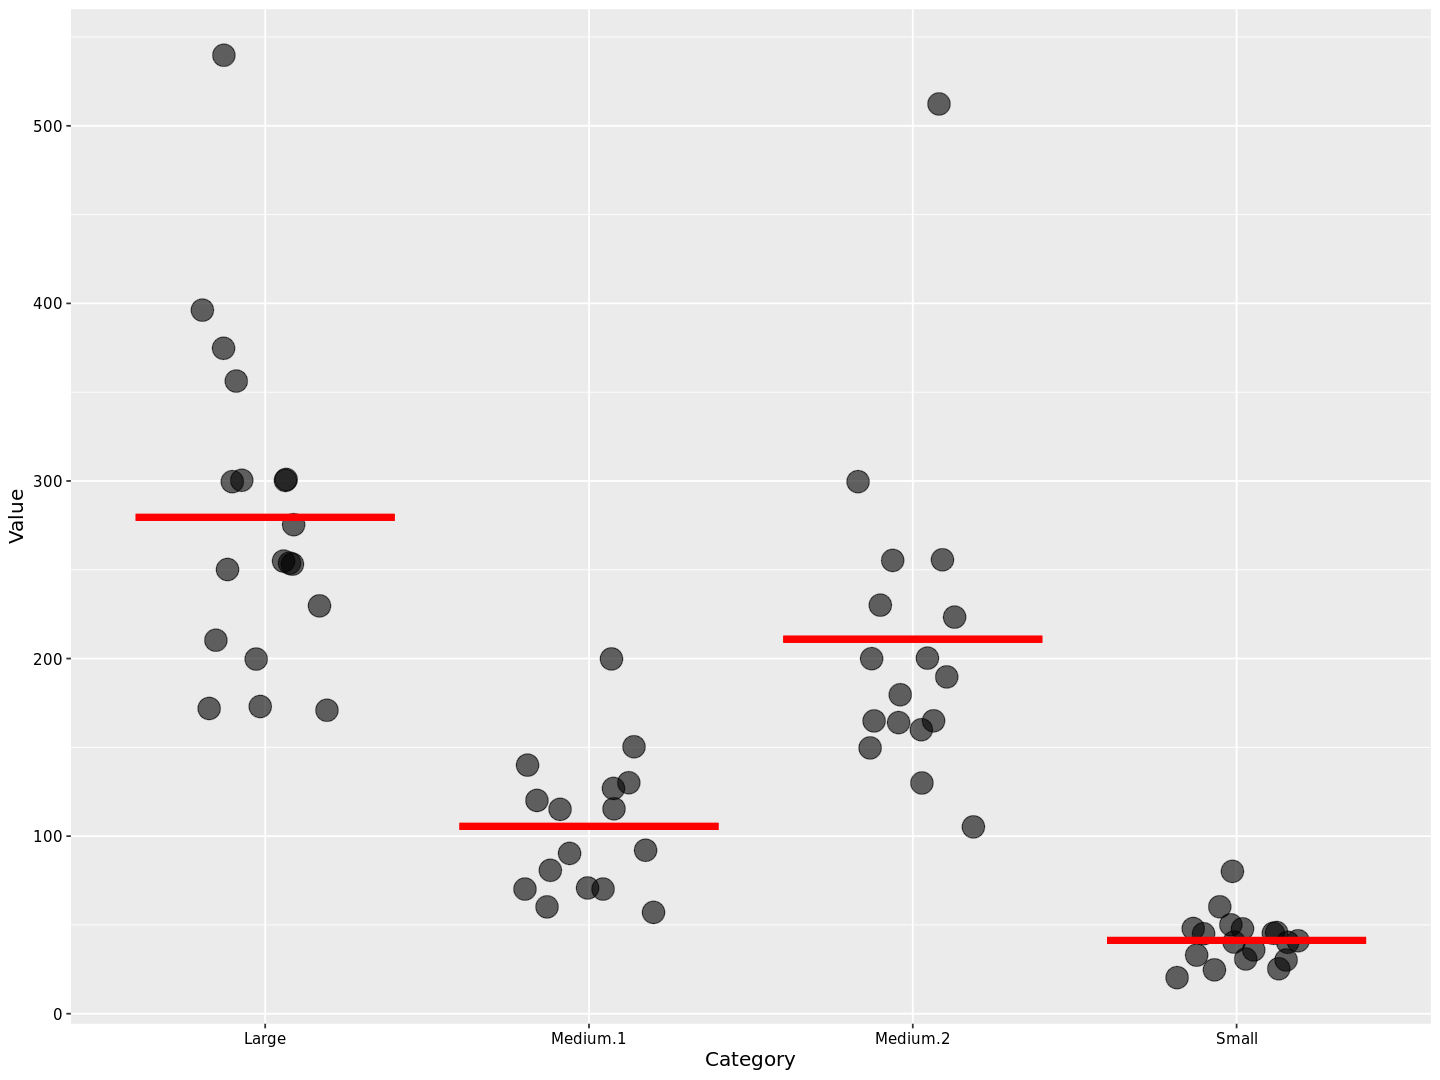

In [9]:
gf_jitter(Value ~ Category, data=guesses, width=0.2, size=6) %>%
    gf_model(Value ~ Category, color="red", size=2, width=0.8)

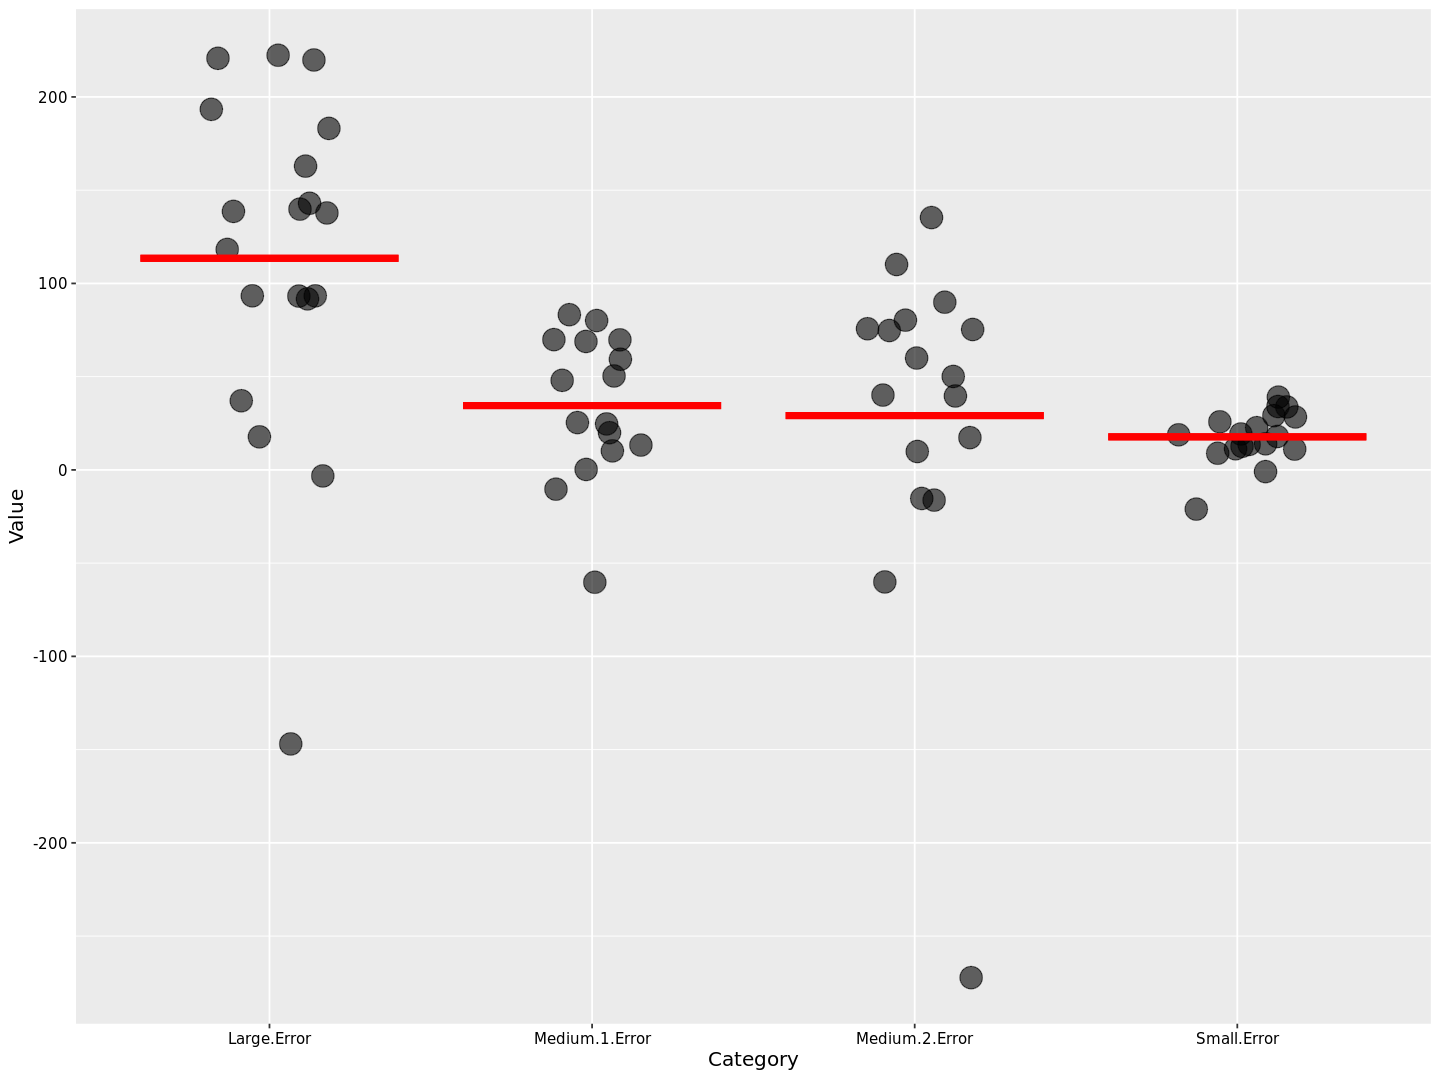

In [10]:
gf_jitter(Value ~ Category, data=errors, width=0.2, size=6) %>%
    gf_model(Value ~ Category, color="red", size=2, width=0.8)

In [11]:
supernova(lm(Value ~ Category, data=guesses))

 Analysis of Variance Table (Type III SS)
 Model: Value ~ Category

                                 SS df         MS      F   PRE     p
 ----- --------------- | ---------- -- ---------- ------ ----- -----
 Model (error reduced) | 616460.473  3 205486.824 43.675 .6650 .0000
 Error (from model)    | 310526.113 66   4704.941                   
 ----- --------------- | ---------- -- ---------- ------ ----- -----
 Total (empty model)   | 926986.586 69  13434.588                   

In [12]:
supernova(lm(Value ~ Category, data=errors))

 Analysis of Variance Table (Type III SS)
 Model: Value ~ Category

                                 SS df        MS     F   PRE     p
 ----- --------------- | ---------- -- --------- ----- ----- -----
 Model (error reduced) | 106552.973  3 35517.658 7.549 .2555 .0002
 Error (from model)    | 310526.113 66  4704.941                  
 ----- --------------- | ---------- -- --------- ----- ----- -----
 Total (empty model)   | 417079.086 69  6044.624                  

In [13]:
sdofPRE <- do(1000)*PRE(shuffle(Value) ~ Category, data=guesses)

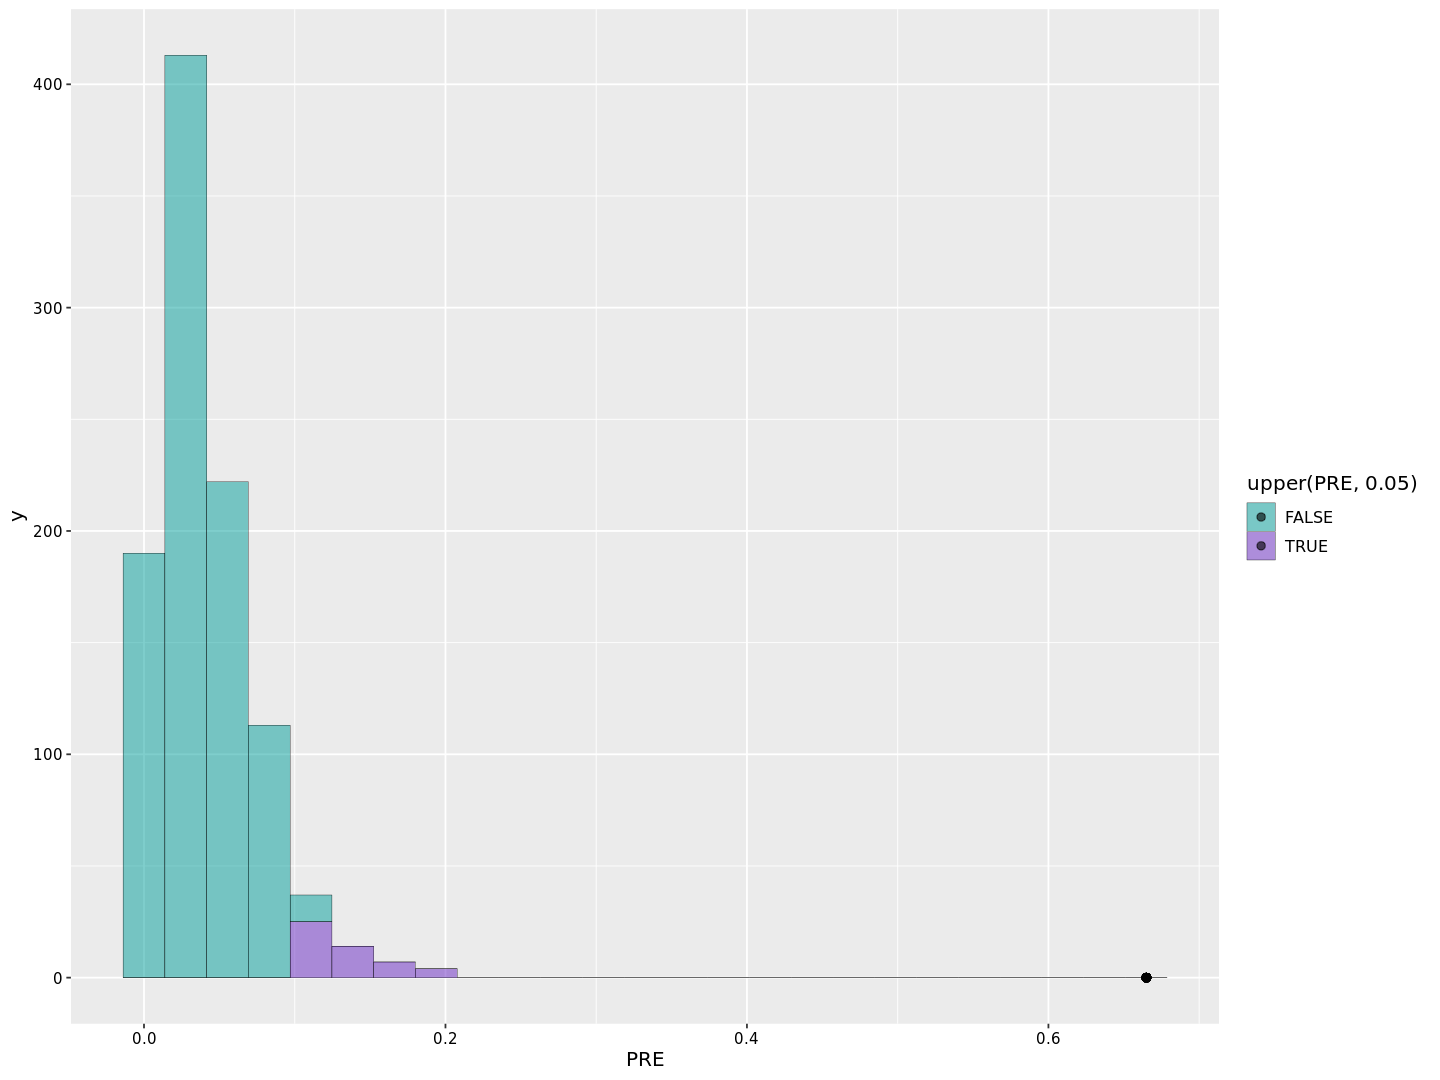

In [14]:
gf_histogram(~PRE, data=sdofPRE, fill=~upper(PRE,0.05)) %>%
    gf_point(0 ~ PRE(Value ~ Category, data=guesses))

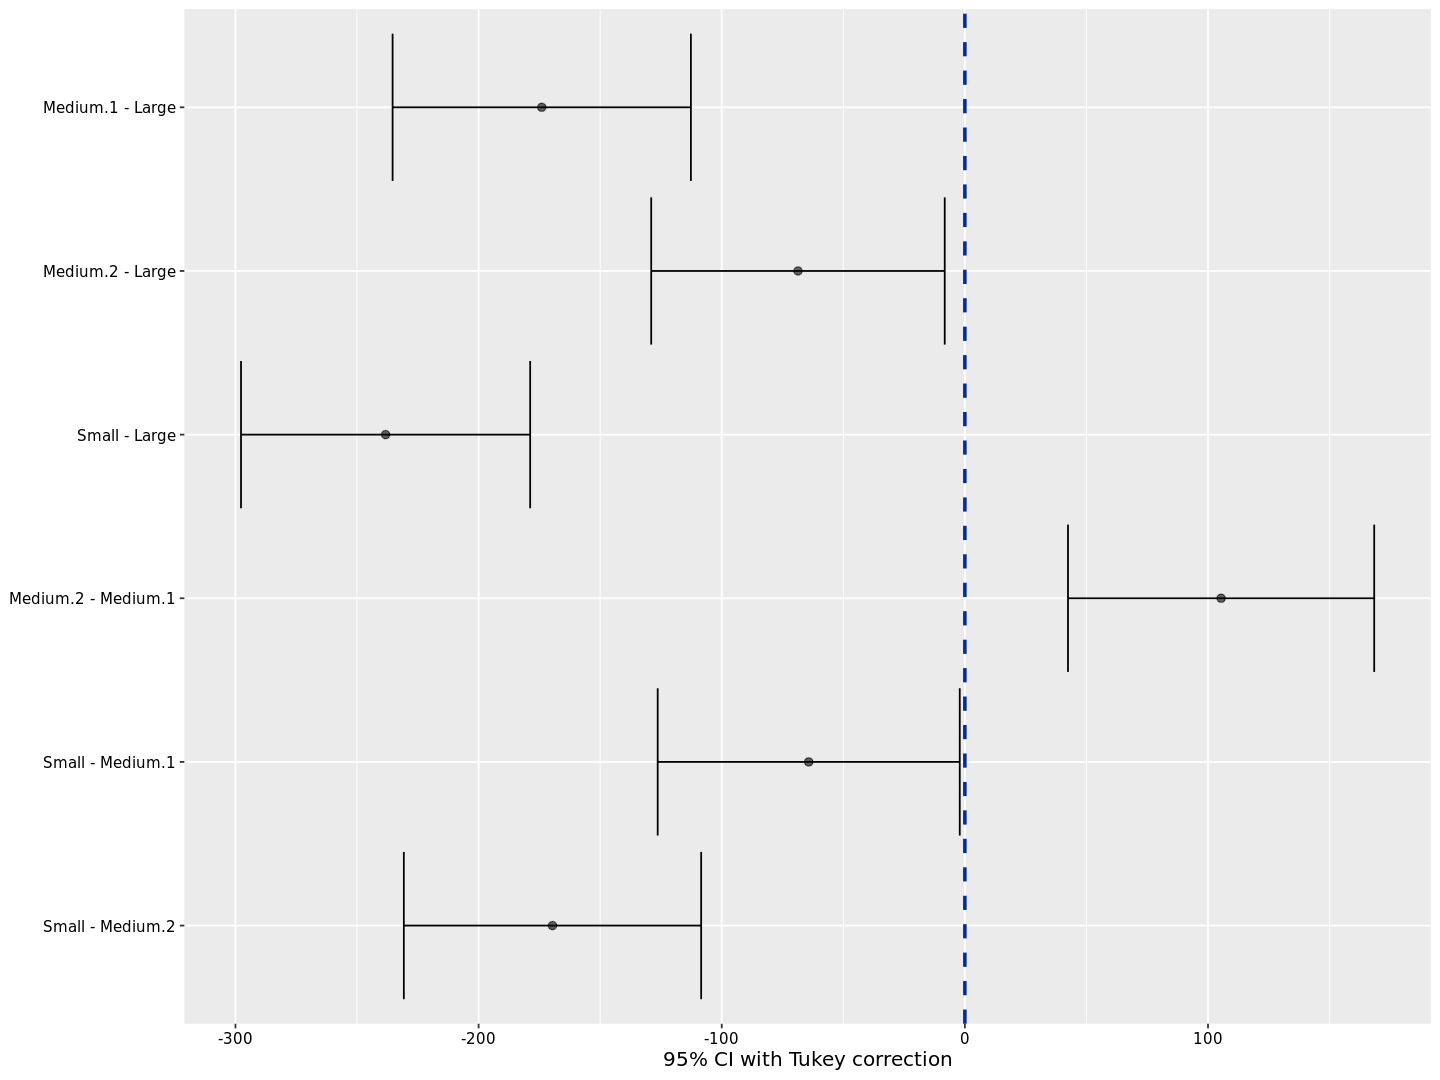

In [15]:
PWC_guesses <- pairwise(lm(Value ~ Category, data=guesses))
plot(PWC_guesses)



── Pairwise t-tests ────────────────────────────────────────────────────────────

Model: Value ~ Category

Category

Levels: 4

Family-wise error-rate: 0.265





  group_1        group_2      diff pooled_se      t    df    lower   upper p_val
  <chr>          <chr>       <dbl>     <dbl>  <dbl> <int>    <dbl>   <dbl> <dbl>
1 Medium.1.Error Large.Er… -78.974    16.457 -4.799    66 -106.429 -51.518 .0000
2 Medium.2.Error Large.Er… -84.356    16.192 -5.210    66 -111.369 -57.343 .0000
3 Small.Error    Large.Er… -95.751    15.953 -6.002    66 -122.366 -69.137 .0000
4 Medium.2.Error Medium.1…  -5.382    16.894 -0.319    66  -33.566  22.802 .7510
5 Small.Error    Medium.1… -16.778    16.665 -1.007    66  -44.580  11.024 .3177
6 Small.Error    Medium.2… -11.395    16.403 -0.695    66  -38.761  15.970 .4897

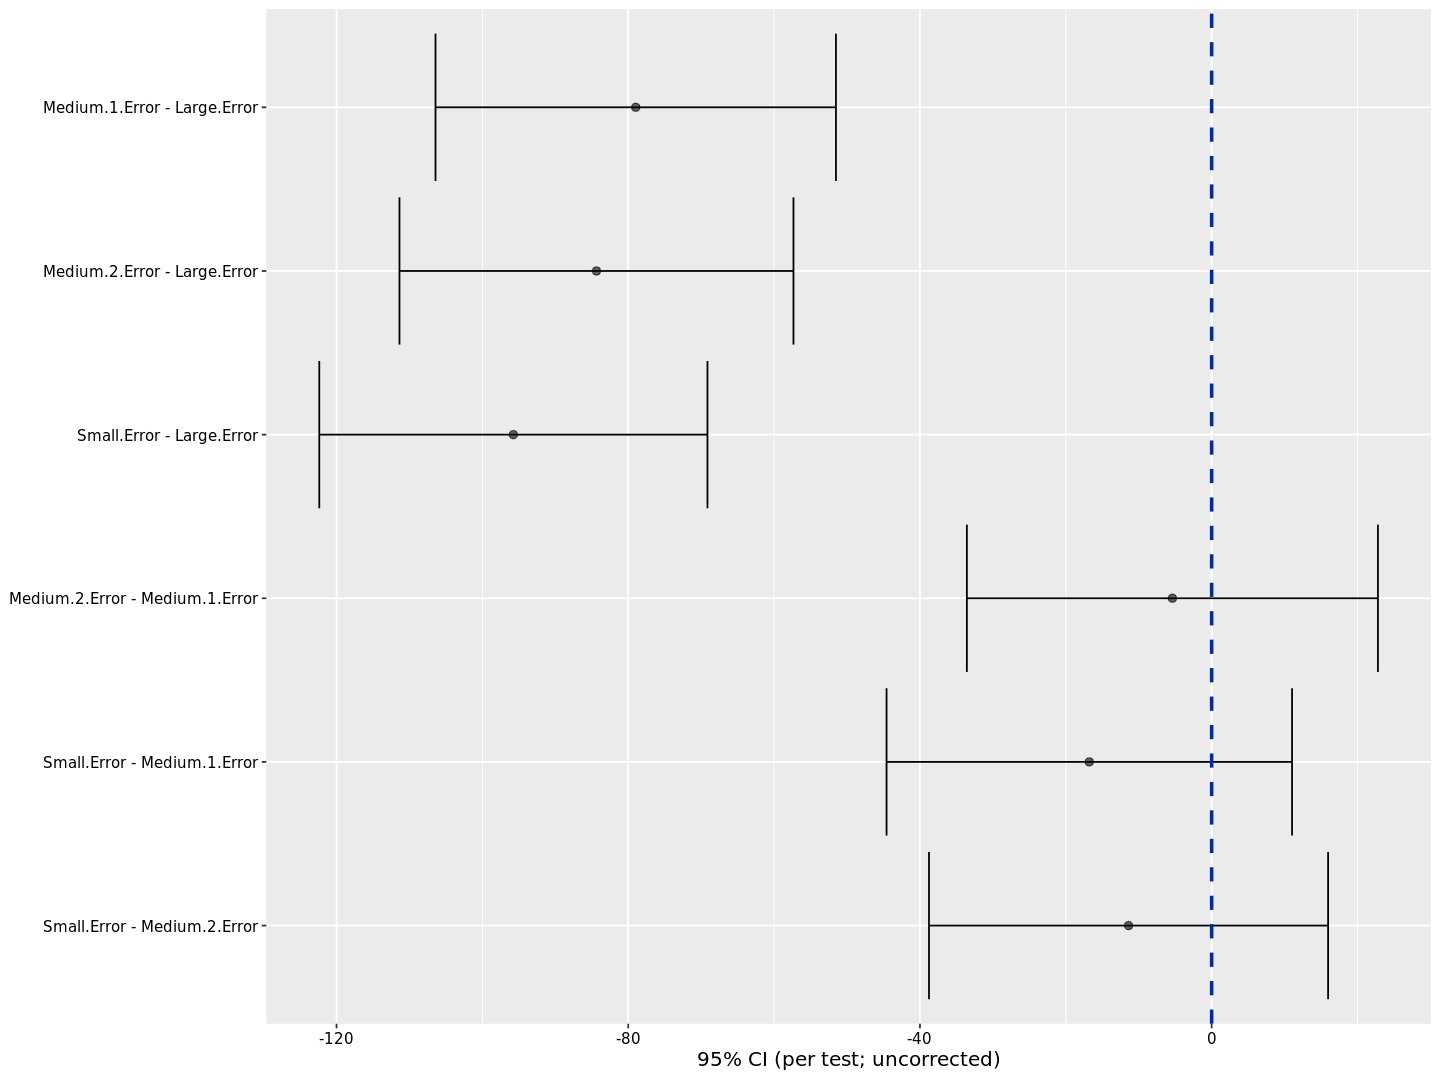

In [16]:
PWC_errors <- pairwise(lm(Value ~ Category, data=errors), correction="none")
plot(PWC_errors)
PWC_errors



── Tukey's Honestly Significant Differences ────────────────────────────────────

Model: Value ~ Category

Category

Levels: 4

Family-wise error-rate: 0.05





  group_1        group_2      diff pooled_se      q    df    lower   upper p_adj
  <chr>          <chr>       <dbl>     <dbl>  <dbl> <int>    <dbl>   <dbl> <dbl>
1 Medium.1.Error Large.Er… -78.974    16.457 -4.799    66 -140.318 -17.630 .0063
2 Medium.2.Error Large.Er… -84.356    16.192 -5.210    66 -144.713 -23.999 .0026
3 Small.Error    Large.Er… -95.751    15.953 -6.002    66 -155.217 -36.286 .0004
4 Medium.2.Error Medium.1…  -5.382    16.894 -0.319    66  -68.354  57.590 .9959
5 Small.Error    Medium.1… -16.778    16.665 -1.007    66  -78.896  45.340 .8920
6 Small.Error    Medium.2… -11.395    16.403 -0.695    66  -72.539  49.748 .9608

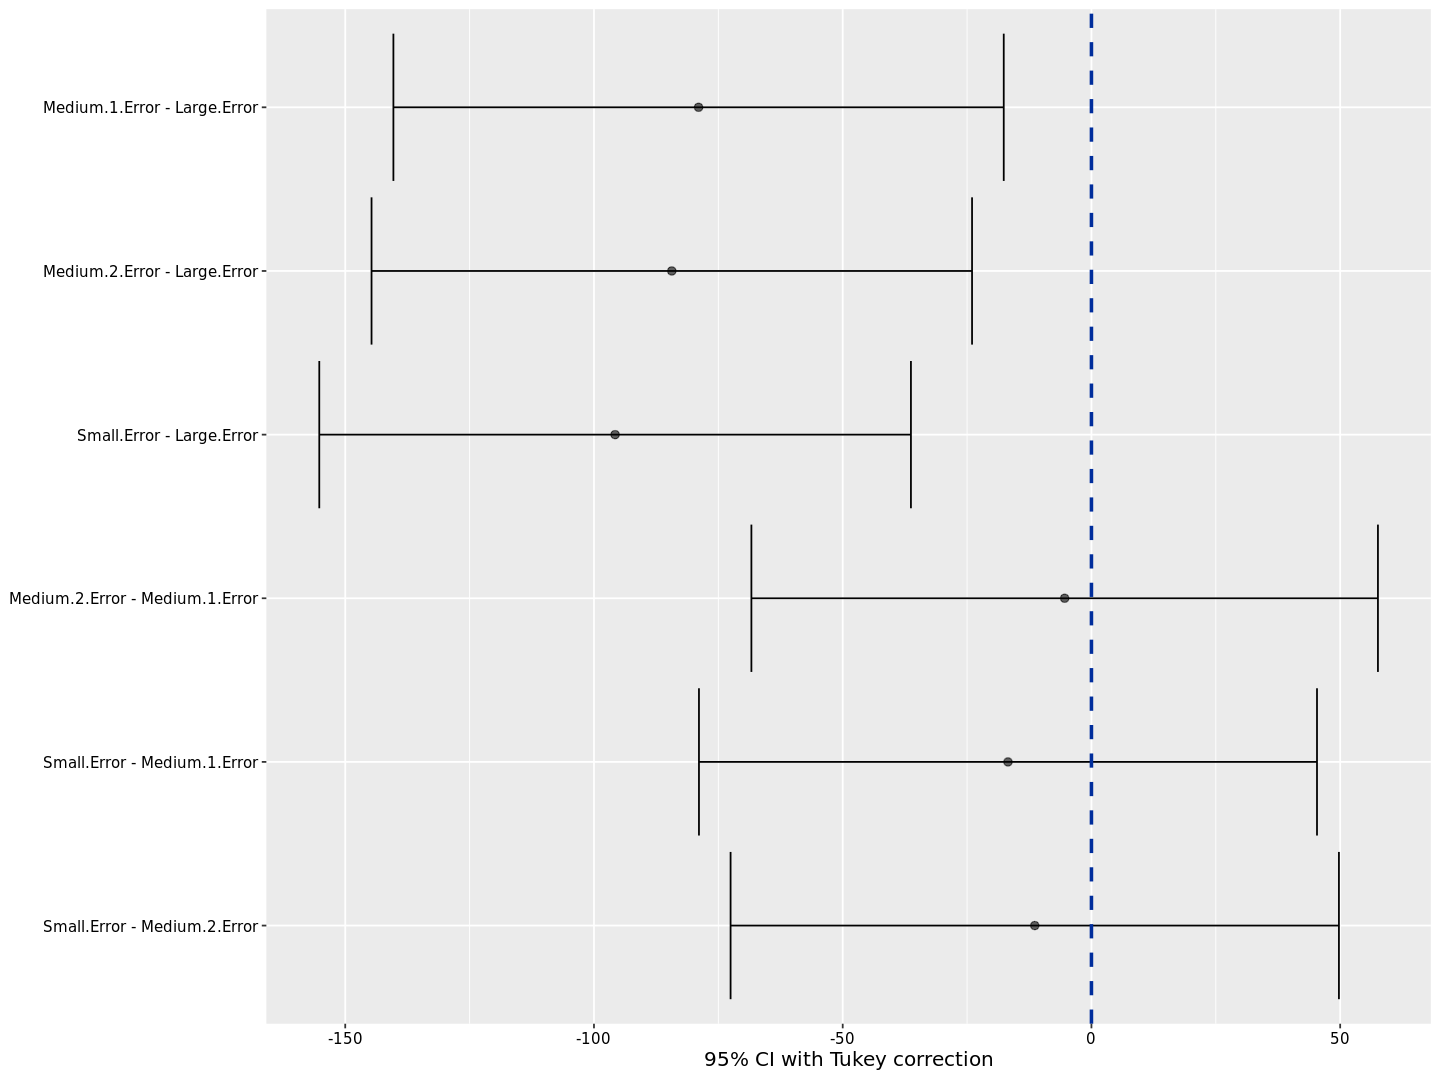

In [17]:
PWC_errors <- pairwise(lm(Value ~ Category, data=errors), correction="Tukey")
plot(PWC_errors)
PWC_errors



── Pairwise t-tests with Bonferroni correction ─────────────────────────────────

Model: Value ~ Category

Category

Levels: 4

Family-wise error-rate: 0.049





  group_1        group_2     diff pooled_se      t    df    lower   upper  p_adj
  <chr>          <chr>      <dbl>     <dbl>  <dbl> <int>    <dbl>   <dbl>  <dbl>
1 Medium.1.Error Large.E… -78.974    16.457 -4.799    66 -119.402 -38.546  .0001
2 Medium.2.Error Large.E… -84.356    16.192 -5.210    66 -124.133 -44.579  .0000
3 Small.Error    Large.E… -95.751    15.953 -6.002    66 -134.941 -56.562  .0000
4 Medium.2.Error Medium.…  -5.382    16.894 -0.319    66  -46.883  36.118 1.0000
5 Small.Error    Medium.… -16.778    16.665 -1.007    66  -57.716  24.160 1.0000
6 Small.Error    Medium.… -11.395    16.403 -0.695    66  -51.691  28.900 1.0000

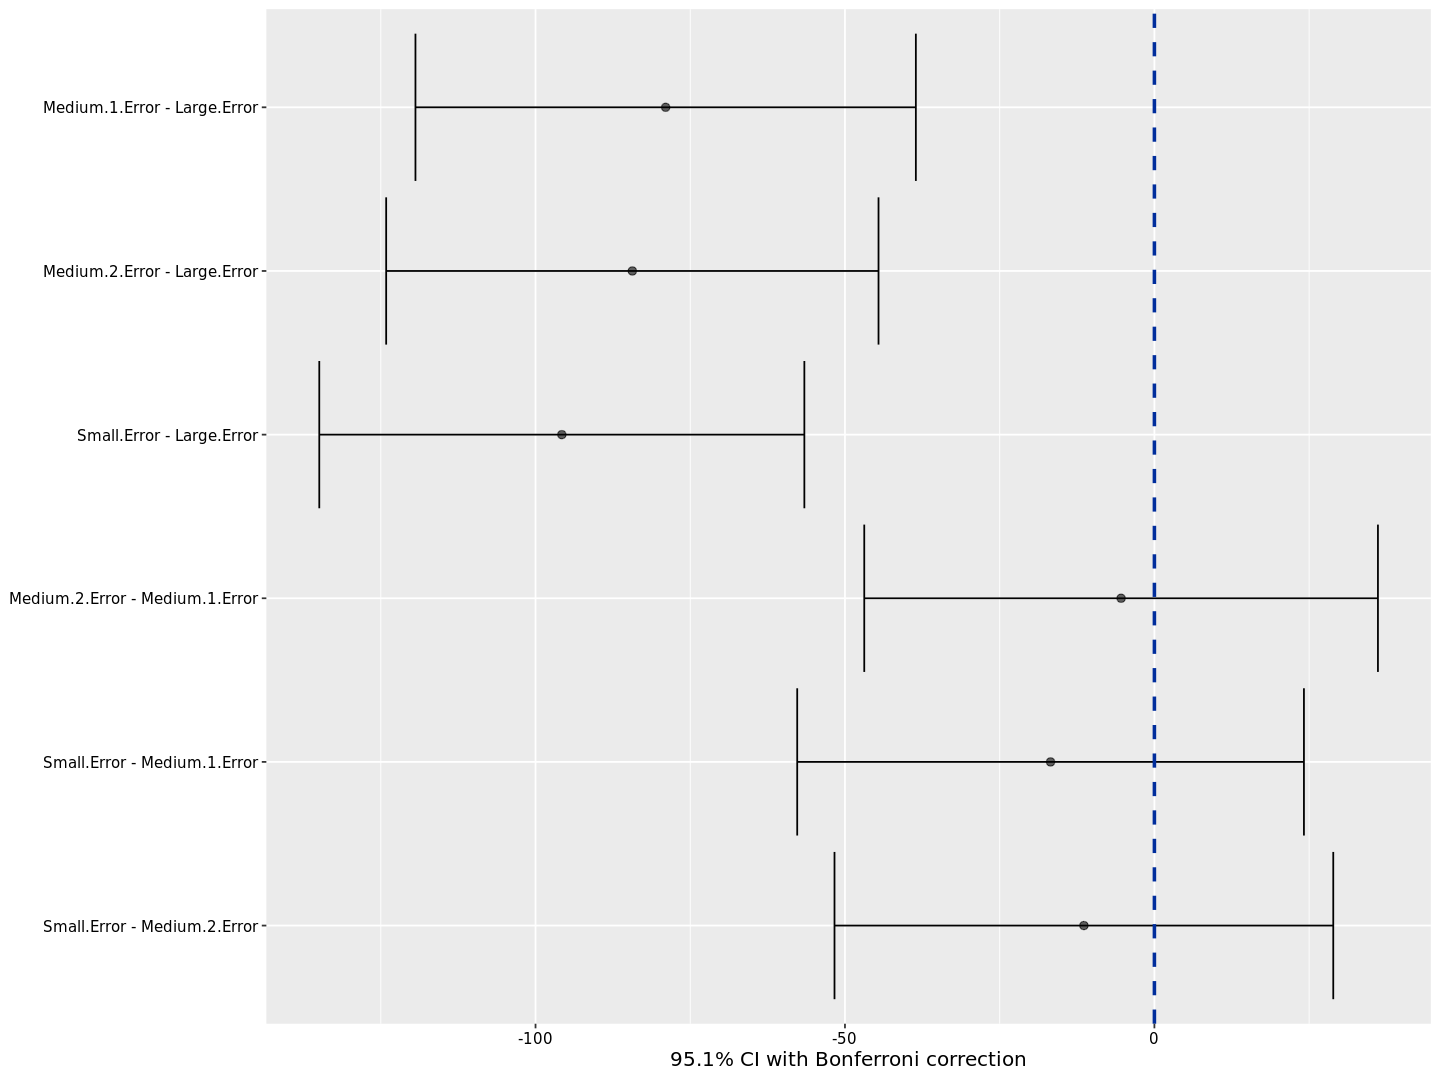

In [18]:
PWC_errors <- pairwise(lm(Value ~ Category, data=errors), correction="Bonferroni")
plot(PWC_errors)
PWC_errors